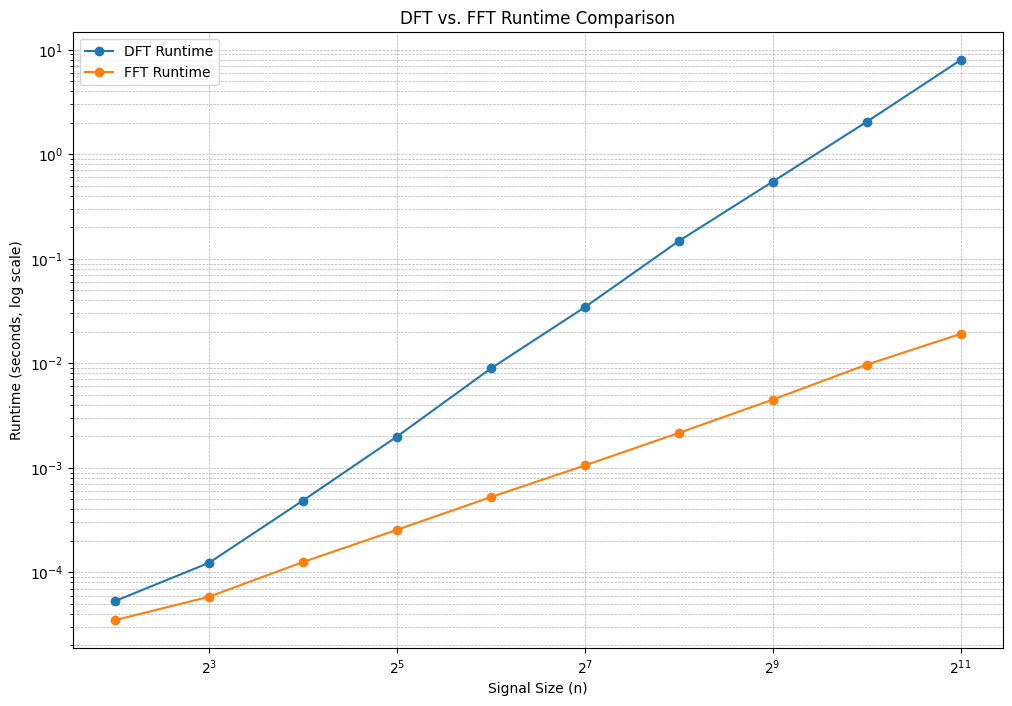

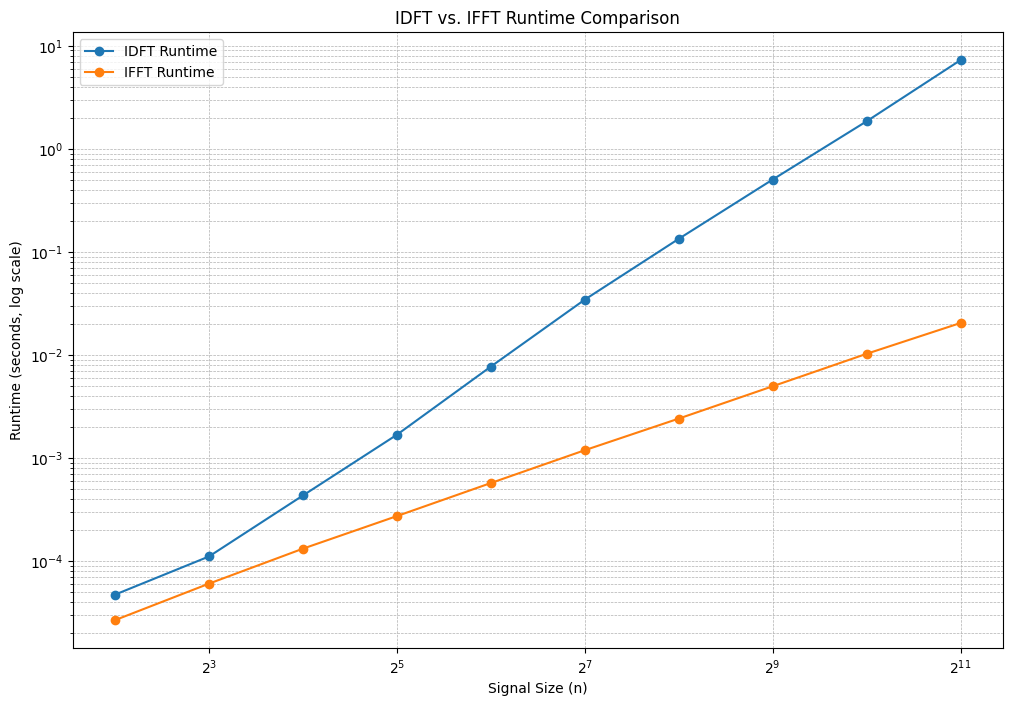

In [6]:
# import numpy as np
# import time
# import matplotlib.pyplot as plt

# # Function to generate a random signal of size n
# def generate_random_signal(n):
#     return np.random.rand(n)

# def dft(signal):
#     """Compute the Discrete Fourier Transform (DFT) of a signal."""
#     N = len(signal)
#     dft_output = np.zeros(N, dtype=complex)
#     for k in range(N):
#         for n in range(N):
#             dft_output[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
#     return dft_output

# def idft(signal_freq):
#     """Compute the Inverse Discrete Fourier Transform (IDFT)."""
#     N = len(signal_freq)
#     idft_output = np.zeros(N, dtype=complex)
#     for n in range(N):
#         for k in range(N):
#             idft_output[n] += signal_freq[k] * np.exp(2j * np.pi * k * n / N)
#     return idft_output / N

# # Corrected FFT implementation
# def fft(signal):
#     """Compute the Fast Fourier Transform (FFT) iteratively."""
#     N = len(signal)
#     if N % 2 != 0:
#         raise ValueError("Signal size must be a power of 2 for this FFT implementation.")
    
#     # Bit-reversal permutation
#     bit_reversed_indices = np.arange(N, dtype=np.uint32)
#     bit_length = int(np.log2(N))
#     for i in range(N):
#         bit_reversed_indices[i] = int(bin(i)[2:].zfill(bit_length)[::-1], 2)
    
#     signal = signal[bit_reversed_indices]
    
#     # Iterative FFT
#     m = 1
#     while m < N:
#         step = m * 2
#         omega_m = np.exp(-2j * np.pi / step)  # Twiddle factor
#         for k in range(0, N, step):
#             omega = 1
#             for j in range(m):
#                 t = omega * signal[k + j + m]
#                 u = signal[k + j]
#                 signal[k + j] = u + t
#                 signal[k + j + m] = u - t
#                 omega *= omega_m
#         m = step
#     return signal

# def ifft(signal_freq):
#     """Compute the Inverse FFT (IFFT) of a signal."""
#     N = len(signal_freq)
#     conjugated = np.conjugate(signal_freq)
#     transformed = fft(conjugated)
#     return np.conjugate(transformed) / N


# # Parameters
# signal_sizes = [2**k for k in range(2, 12)]  # Sizes:2^1, ..., 2^11
# dft_runtimes = []
# idft_runtimes = []
# fft_runtimes = []
# ifft_runtimes = []

# # Measure and average runtimes over 10 runs
# num_runs = 50
# for size in signal_sizes:
#     dft_times = []
#     idft_times = []
#     fft_times = []
#     ifft_times = []

#     for _ in range(num_runs):
#         signal = generate_random_signal(size)

#         # Measure DFT runtime
#         start_time = time.perf_counter()
#         dft_output = dft(signal)
#         dft_times.append(time.perf_counter() - start_time)

#         # Measure IDFT runtime
#         start_time = time.perf_counter()
#         idft_output = idft(dft_output)
#         idft_times.append(time.perf_counter() - start_time)

#         # Measure FFT runtime
#         start_time = time.perf_counter()
#         fft_output = fft(signal)
#         fft_times.append(time.perf_counter() - start_time)

#         # Measure IFFT runtime
#         start_time = time.perf_counter()
#         ifft_output = ifft(fft_output)
#         ifft_times.append(time.perf_counter() - start_time)

#     # Compute average runtime for each algorithm
#     dft_runtimes.append(np.mean(dft_times))  # Keep in seconds
#     idft_runtimes.append(np.mean(idft_times))  # Keep in seconds
#     fft_runtimes.append(np.mean(fft_times))  # Keep in seconds
#     ifft_runtimes.append(np.mean(ifft_times))  # Keep in seconds

# # Plot runtime comparison for DFT and FFT
# plt.figure(figsize=(12, 6))
# plt.plot(signal_sizes, dft_runtimes, label="DFT Runtime", marker='o')
# plt.plot(signal_sizes, fft_runtimes, label="FFT Runtime", marker='o')

# # Set logarithmic scales
# plt.yscale('log')
# plt.xscale('log', base=2)

# # Labels and title
# plt.xlabel("Signal Size (n)")
# plt.ylabel("Runtime (seconds, log scale)")
# plt.title("DFT vs. FFT Runtime Comparison")
# plt.legend()
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.show()

# # Plot runtime comparison for IDFT and IFFT
# plt.figure(figsize=(12, 6))
# plt.plot(signal_sizes, idft_runtimes, label="IDFT Runtime", marker='o')
# plt.plot(signal_sizes, ifft_runtimes, label="IFFT Runtime", marker='o')

# # Set logarithmic scales
# plt.yscale('log')
# plt.xscale('log', base=2)

# # Labels and title
# plt.xlabel("Signal Size (n)")
# plt.ylabel("Runtime (seconds, log scale)")
# plt.title("IDFT vs. IFFT Runtime Comparison")
# plt.legend()
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.show()


import numpy as np
import time
import matplotlib.pyplot as plt

# Signal generation
def generate_random_signal(size):
    return np.random.rand(size)

# Parameters
signal_sizes = [2**k for k in range(2, 12)]  # Sizes: 2^2 to 2^11
#dft_signal_sizes = signal_sizes[:7]          # Limit DFT/IDFT to 2^2 to 2^8

# Pre-generate signals for all sizes
signal_data = {size: generate_random_signal(size) for size in signal_sizes}

# Runtime storage
dft_runtimes = []
idft_runtimes = []
fft_runtimes = []
ifft_runtimes = []

# Number of runs for averaging
num_runs = 20

# Functions for DFT and IDFT (inefficient implementations for comparison)
def dft(signal):
    N = len(signal)
    return np.array([sum(signal[k] * np.exp(-2j * np.pi * k * n / N) for k in range(N)) for n in range(N)])

def idft(signal):
    N = len(signal)
    return np.array([sum(signal[k] * np.exp(2j * np.pi * k * n / N) for k in range(N)) for n in range(N)]) / N

# FFT and IFFT (optimized implementations)
def fft(signal):
    N = len(signal)
    if N <= 1:
        return signal
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for this FFT implementation.")
    even = fft(signal[::2])
    odd = fft(signal[1::2])
    terms = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd
    return np.concatenate([even + terms, even - terms])

def ifft(signal):
    N = len(signal)
    if N <= 1:
        return signal
    if N % 2 != 0:
        raise ValueError("Signal size must be a power of 2 for this IFFT implementation.")
    even = ifft(signal[::2])
    odd = ifft(signal[1::2])
    terms = np.exp(2j * np.pi * np.arange(N // 2) / N) * odd
    return (np.concatenate([even + terms, even - terms]) / 2)

# Measure runtimes for DFT and IDFT
for size in signal_sizes:
    dft_times = []
    idft_times = []
    signal = signal_data[size]

    for _ in range(num_runs):
        # Measure DFT runtime
        start_time = time.perf_counter_ns()
        dft_output = dft(signal)
        dft_times.append(time.perf_counter_ns() - start_time)

        # Measure IDFT runtime
        start_time = time.perf_counter_ns()
        idft_output = idft(dft_output)
        idft_times.append(time.perf_counter_ns() - start_time)

    # Store average runtimes (convert ns to seconds)
    dft_runtimes.append(np.mean(dft_times) / 1e9)
    idft_runtimes.append(np.mean(idft_times) / 1e9)

# Measure runtimes for FFT and IFFT
for size in signal_sizes:
    fft_times = []
    ifft_times = []
    signal = signal_data[size]

    for _ in range(num_runs):
        # Measure FFT runtime
        start_time = time.perf_counter_ns()
        fft_output = fft(signal)
        fft_times.append(time.perf_counter_ns() - start_time)

        # Measure IFFT runtime
        start_time = time.perf_counter_ns()
        ifft_output = ifft(fft_output)
        ifft_times.append(time.perf_counter_ns() - start_time)

    # Store average runtimes (convert ns to seconds)
    fft_runtimes.append(np.mean(fft_times) / 1e9)
    ifft_runtimes.append(np.mean(ifft_times) / 1e9)

# Plot DFT vs FFT
plt.figure(figsize=(12, 8))
plt.plot(signal_sizes, dft_runtimes, label="DFT Runtime", marker='o')
plt.plot(signal_sizes, fft_runtimes, label="FFT Runtime", marker='o')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel("Signal Size (n)")
plt.ylabel("Runtime (seconds, log scale)")
plt.title("DFT vs. FFT Runtime Comparison")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Plot IDFT vs IFFT
plt.figure(figsize=(12, 8))
plt.plot(signal_sizes, idft_runtimes, label="IDFT Runtime", marker='o')
plt.plot(signal_sizes, ifft_runtimes, label="IFFT Runtime", marker='o')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel("Signal Size (n)")
plt.ylabel("Runtime (seconds, log scale)")
plt.title("IDFT vs. IFFT Runtime Comparison")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
